# **LIBRARY**

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imageio
from scipy import ndimage

1. import dataset yang ingin digunakan, terdapat 2 foto yaitu foto img (satu object foto) dan juga foto scene (sebuah foto yang berisikan banyak object lain, akan tetapi ada satu object foto img yang nantinya akan di matching dengan foto scene)
2. ubah jadi grayscale dari masing masing foto, tujuannya adalah mempermudah karena jika kita menggunakan grayscale, maka nanti hanya ada satu channel warna saja
3. lalu kita lakukan surf (speeded up robust features) untuk masing masing foto, algoritma surf sendiri akan mengembalikan 2 return yaitu keypoint (titik titik yang akan dibuat didalam gambar, titik ini menandakan unique point yang nantinya akan dicompare dari kedua gambar) dan descriptor (berbentuk vector nilai yang nantinya akan ditraining masing masing gambar dengan nilai). Cara kerja surf sendiri dengan cara mencari nilai ekstrim pada skala ruang nya, awalnya kita akan mencari dominant orientation dari image tersebut, nantinya kita akan mendapatkan representasi dari arah vector gambar tersebut, misalkan arahnya ternyata 60 derajat, kemudian kita akan menghitung nilai descriptor dari dominant orientation tersebut dengan membagi menjadi subregions masing masing, misalkan subregions dengan ukuran 4x4, nanti akan ada 4 feature dari masing masing subregions, yaitu nilai dx, dy, |dx|, dan |dy|, dari nilai itu nantinya kita akan mengkalkulasikan sesuai dengan rumus yang hasil akhirnya akan menjadi dimentional feature vector. Dari situ kita bisa mendapatkan key-point matching menggunakan hessain matrix.
4. lalu kita akan melakukan CLAHE, CLAHE sendiri adalah histogram equalization yang bertujuan untuk mengurangi noise dengan cara menentukan kernel matriks dan bekerja dengan menggantikan nilai intensitas setiap input pixel dengan rata rata dari pembobotan kernel untuk setiap pixel tetangganya dan pixel itu sendiri.
5. lalu kita akan melakukan flann, flann sendiri merupakan algoritma KNN (K-nearest neighbours) yang menerima input 2 data descriptor (img dan scene), nantinya menggunakan algoritma KNN, flann.knnMatch() akan me-return output sebuah matches, dimana matches tersebut adalah garis kemiripan antara img dan scene
6. kemudian saya akan membuat setiap matches menjadi 0 (tidak ditampilkan dulu), lalu saya loop lagi dengan syarat sekarang jika matches tersebut sudah sesuai dengan persenan kemauan saya (nilai minimal untuk dia bisa ditampilkan, kalau disoal saya jadikan nilai itu adalah 0.4 * n.distance) baru deh saya tampilin itu garis lagi jadi 1 nilainya
7. setelah selesai, saya plotting dan tampilkan dan berhasil terbentuk sebuah image matching

import dataset

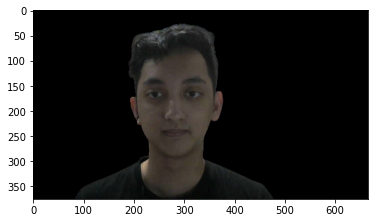

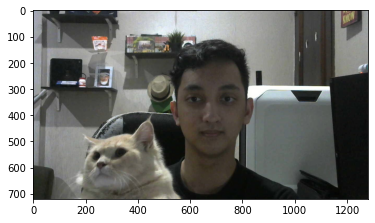

In [96]:
img = cv2.imread("img.png")
scene = cv2.imread("scene.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

img_color = img
scene_color = scene

plt.imshow(img)
plt.show()
plt.imshow(scene)
plt.show()

ubah jadi grayscale

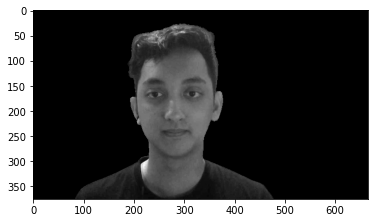

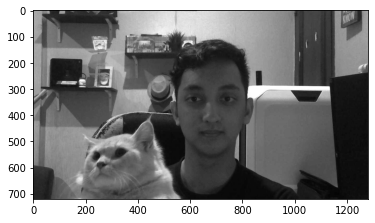

In [97]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
scene = cv2.cvtColor(scene, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(scene, cmap='gray')
plt.show()

saya membuat object untuk algorithm surf (untuk mencari corner detection nya) dan juga clahe (histogram equalization)

In [98]:
surf = cv2.SIFT_create()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize =(3,3))
scene = clahe.apply(scene)

disini saya membuat keypoint image dan juga descriptornya

In [99]:
keypoint_img, descriptor_img = surf.detectAndCompute(img, None)
keypoint_scene, descriptor_scene = surf.detectAndCompute(scene, None)
INDEX_PARAMS = dict(algorithm = 1)
SEARCH_PARAMS = dict(checks = 50)

saya menggunakan algorithm flann (mencari nearest neighbours) dan juga matches menggunakan knnMatch menggunakan descriptor scene dan img masing-masing

In [100]:
flann = cv2.FlannBasedMatcher(INDEX_PARAMS, SEARCH_PARAMS)
matches = flann.knnMatch(descriptor_scene, descriptor_img, k = 2)
valid_matches = []

ini merupakan initialisasi semua nilai valid matches menjadi 0 semua, nanti bakal dibuat satu (ada garisnya) menggunakan code setelah ini

In [101]:
for i in range(len(matches)):
    valid_matches.append([0,0])

disini saya mencari garis, jika garis tersebut lebih kecil daripada nilai 0.4 (ini nilai yang saya buat sendiri coba coba satu persatu yang menurut saya hasilnyas sudah cukup memuaskan) * n.distance lebih besar dari m.distance (nilai kemiripannya) maka saya buat garis tersebut, else nggak dibuat

In [102]:
for idx,(m,n) in enumerate(matches):
    if m.distance < 0.5 * n.distance:
        valid_matches[idx] = [1,0]

disini saya membuat result images dengan menggabungkan 2 foto image dan scene serta juga titik keypoint serta garis hijau dari masing masing image dan scene yang memiliki kemiripan

In [103]:
result_img = cv2.drawMatchesKnn( 
    scene_color, 
    keypoint_scene,
    img_color, 
    keypoint_img, 
    matches, 
    None, 
    matchColor = [0,255,0],
    matchesMask = valid_matches
    )

bisa dilihat bahwa muka saya dari gambar img.png (image tersebut saya hapus background nya supaya biar lebih jelas, soalnya kalo pake background jadi banyak banget kemiripan di backgroundnya soalnya lokasi foto sama) berhasil terdeteksi dan bukan muka kucing saya yang terdeteksi

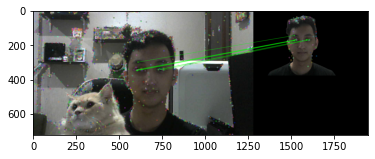

In [104]:
plt.imshow(result_img)
plt.show()